In [42]:
import pandas as pd
import numpy as np
import re as re
import sklearn
from sklearn import datasets
from sklearn import preprocessing
from sklearn import svm 
from sklearn.ensemble import  RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
import os
os.chdir('/Users/yynpy/Desktop/resources/job/川谷/credit')
sampleEntry = pd.read_csv("sampleEntry.csv") 
cs_test = pd.read_csv("cs-test.csv")
cs_training = pd.read_csv("cs-training.csv")

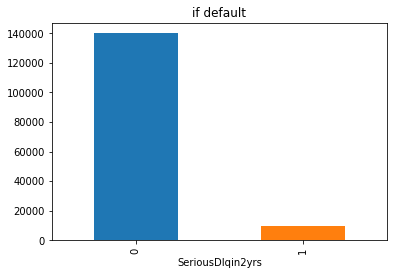

0.06684


In [81]:
grouped = cs_training['SeriousDlqin2yrs'].groupby(cs_training['SeriousDlqin2yrs']).count()
grouped.plot(kind = 'bar',title = 'if default')
plt.show()
default_rate = grouped[1]/len(cs_training)
print(default_rate)

来画一堆盒形图看看有没有outlier吧！其实我是用R看的。。不能画到一张图上，就随便看看吧

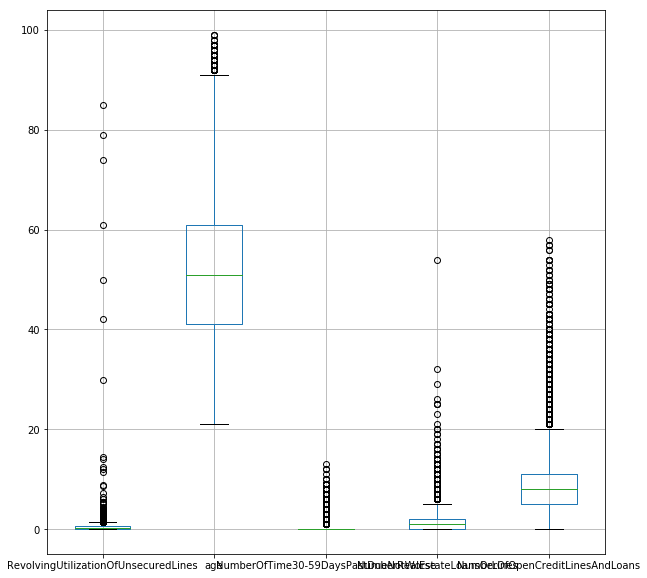

In [82]:
plt.figure(figsize=(10, 10)) 
cs_training_cleaned1[['RevolvingUtilizationOfUnsecuredLines',
                      'age',
                      'NumberOfTime30-59DaysPastDueNotWorse',
                      'NumberRealEstateLoansOrLines', 
          'NumberOfOpenCreditLinesAndLoans',]].boxplot()
plt.show()

剔除异常值，主要是不合常理的年龄和过大的DebtRatio，但是DebtRatio怎么会这么大？我好迷茫啊！后面五个变量其实没有大于100的值呵呵哈。
MonthlyIncome的NA值在这里还是保留的

In [83]:
cs_training_cleaned = cs_training[cs_training['RevolvingUtilizationOfUnsecuredLines'] < 100]
cs_training_cleaned = cs_training_cleaned[cs_training_cleaned['age'] > 0]
cs_training_cleaned = cs_training_cleaned[cs_training_cleaned['age'] < 100]
cs_training_cleaned = cs_training_cleaned[cs_training_cleaned['NumberOfTime30-59DaysPastDueNotWorse'] < 80]
cs_training_cleaned = cs_training_cleaned[cs_training_cleaned['DebtRatio'] < 10000]
cs_training_cleaned = cs_training_cleaned[cs_training_cleaned['NumberOfOpenCreditLinesAndLoans'] < 100]
cs_training_cleaned = cs_training_cleaned[cs_training_cleaned['NumberOfTimes90DaysLate'] < 100]
cs_training_cleaned = cs_training_cleaned[cs_training_cleaned['NumberRealEstateLoansOrLines'] < 100]
cs_training_cleaned = cs_training_cleaned[cs_training_cleaned['NumberOfTime60-89DaysPastDueNotWorse'] < 100]
cs_training_cleaned = cs_training_cleaned[cs_training_cleaned['NumberOfDependents'] < 100]

然后我把MonthlyIncome的NA去掉了

In [85]:
#cs_training_cleaned['SeriousDlqin2yrs'].groupby(cs_training_cleaned['MonthlyIncome']).count()

MonthlyIncome
0.0          1608
1.0           601
2.0             6
4.0             2
5.0             2
7.0             1
9.0             1
10.0            2
11.0            1
15.0            1
21.0            1
25.0            1
27.0            2
34.0            1
40.0            2
42.0            1
50.0            4
55.0            1
56.0            1
69.0            1
70.0            2
72.0            1
75.0            1
83.0            1
84.0            1
100.0          24
101.0           1
105.0           1
107.0           1
115.0           1
             ... 
173000.0        1
184903.0        1
203500.0        1
208333.0        1
218674.0        1
234600.0        1
235000.0        1
237400.0        1
237490.0        1
250000.0        2
251608.0        1
261666.0        1
287662.0        1
304000.0        1
324000.0        1
408333.0        1
428250.0        1
440000.0        1
562466.0        1
582369.0        1
629000.0        1
649587.0        1
699530.0        1
702500.0      

In [105]:
cs_training_cleaned1 = cs_training_cleaned.dropna()
len(cs_training_cleaned)-len(cs_training_cleaned1)
#cs_training_cleaned2 = cs_training_cleaned[cs_training_cleaned['MonthlyIncome'] == 'NAN']
#cs_training_cleaned['MonthlyIncome']
#cs_training_cleaned['MonthlyIncome'] == "NaN"

25513

MonthlyIncome为NaN的数据还挺多的，我想把他们分成另一个数据集。但是不知道怎么操作- -

In [106]:
X = cs_training_cleaned1.drop(['SeriousDlqin2yrs'],axis=1).values
X = np.nan_to_num(X)
X = np.delete(X,0,1)
y = cs_training_cleaned1.SeriousDlqin2yrs.values
y = np.nan_to_num(y)
XX = cs_test.drop(['SeriousDlqin2yrs'],axis=1).values
XX = np.nan_to_num(XX)
XX = np.delete(XX,0,1)
#XXX = XX[0,100,:]

X1 = X[0:100,:]
y1 = y[0:100]
XX1 = X[100:200,:]


In [73]:
clf = svm.SVC()  
clf.fit(X1, y1)  # 训练ＳＶＣ模型
result = clf.predict(XX1)  # 预测　测试样本
print(result)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


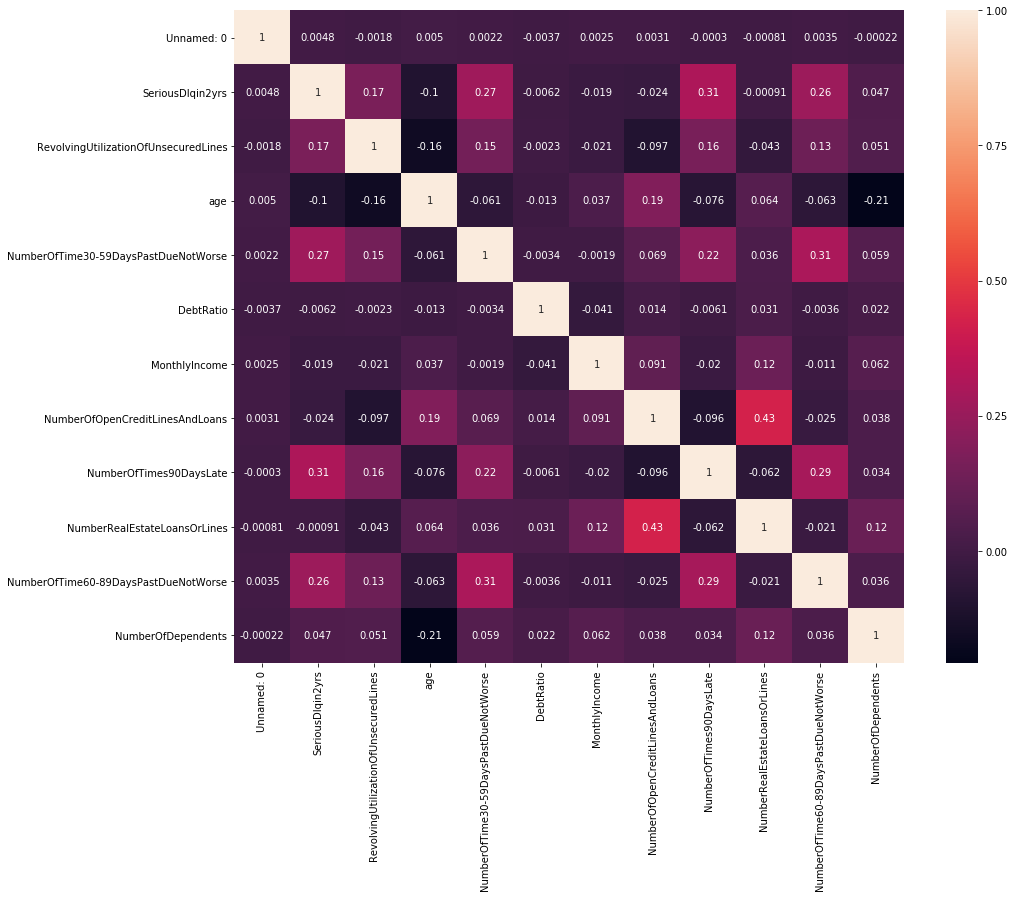

In [74]:
import seaborn as sns
corr = cs_training_cleaned1.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr, annot=True, fmt='.2g')

哇塞相关性真的一点都不高也哈哈哈哈哈,来看看线性回归（抄的

In [28]:
# 用线性回归模型
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=111)

# 调用线性回归函数，C为正则化系数，l1表示L1正则化
logit = LogisticRegression(random_state=111, solver='saga', penalty='l1', class_weight='balanced', C=1.0, max_iter=500)

# 标准化拟合
scaler = StandardScaler().fit(X_train)

# 标准化X_train 和X_test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 线性回归拟合
logit.fit(X_train_scaled, y_train)

# 输入训练集，返回每个样本对应到每种分类结果的概率
logit_scores_proba = logit.predict_proba(X_train_scaled)

# 返回分类1的概率
logit_scores = logit_scores_proba[:,1]

In [54]:
# 画图
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(3,3))
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1], "k--") # 画直线做参考
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive rate")

0.8441566828747501

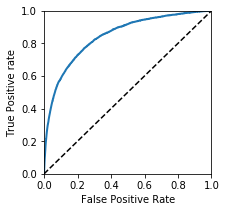

In [55]:
# roc_curve根据分类结果和分类概率，返回false positive rage和true positive rate
fpr_logit, tpr_logit, thresh_logit = roc_curve(y_train, logit_scores)

# 画图
plot_roc_curve(fpr_logit,tpr_logit)
roc_auc_score(y_train,logit_scores)
#print('AUC Score : ‘, (roc_auc_score(y_train,logit_scores)))

0.84828002112001288

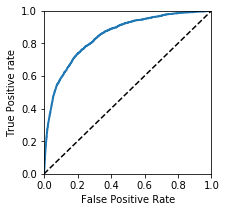

In [56]:
# 验证测试集，测试分类结果概率分布
logit_scores_proba_val = logit.predict_proba(X_test_scaled)

# 分类结果为1的概率
logit_scores_val = logit_scores_proba_val[:,1]

# roc_curve根据分类结果和分类概率，返回false positive rage和true positive rate
fpr_logit_val, tpr_logit_val, thresh_logit_val = roc_curve(y_test, logit_scores_val)

# 画图
plot_roc_curve(fpr_logit_val,tpr_logit_val)
(roc_auc_score(y_test,logit_scores_val))

In [58]:
# 采用LogisticRegressionCV来交叉验证选择正则化系数C
from sklearn.linear_model import LogisticRegressionCV
logit = LogisticRegressionCV(Cs=[0.001, 0.01, 0.1, 1, 10, 100], penalty='l1', solver='saga', max_iter=500, class_weight='balanced', random_state=111)

# 线性回归拟合
logit.fit(X_train_scaled, y_train)
logit.C_

array([ 0.001])

0.8441566828747501

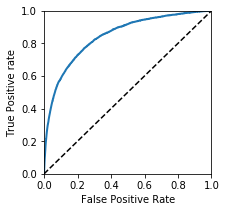

In [59]:
# 输入训练集，返回每个样本对应到每种分类结果的概率
logit_scores_proba = logit.predict_proba(X_train_scaled)

# 返回分类1的概率
logit_scores = logit_scores_proba[:,1]

# roc_curve根据分类结果和分类概率，返回false positive rage和true positive rate
fpr_logit, tpr_logit, thresh_logit = roc_curve(y_train, logit_scores)

# 画图
plot_roc_curve(fpr_logit,tpr_logit)
(roc_auc_score(y_train,logit_scores))

In [60]:
# 引入降采样模块
import imblearn
from imblearn.under_sampling import RandomUnderSampler

# Counter类的目的是用来跟踪值出现的次数
from collections import Counter
print('Original dataset shape :',Counter(y))

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
forest = RandomForestClassifier(n_estimators=300, random_state=111, max_depth=5, class_weight='balanced')
forest.fit(X_train_rus, y_train_rus)
y_scores_prob = forest.predict_proba(X_train_rus)
y_scores = y_scores_prob[:, 1]
fpr, tpr, thresh = roc_curve(y_train_rus, y_scores)
plot_roc_curve(fpr, tpr)
roc_auc_score(y_train_rus, y_scores)